## Линейнын сплайны

$\textbf{Линейный сплайн}$ (дефекта 1), интерполирующий $f(x)$ на $[a, b]$: $$c(x) := b_k + a_k (x-x_k),$$ 

где $x\in [x_{k-1}, x_{k}] \big|_{k=1}^n$

$\textbf{Обозначение линейного сплайна дефекта 1}$: $S^n_{1,0}$, где $n, 1, 0$ - кол-во узлов интерполирования, старшая степень и порядок гладкости сплайна соответственно.

In [32]:
import numpy as np
import matplotlib.pyplot as plt 
np.set_printoptions(suppress=True) # чтобы оч маленькие значения печатались в виде нулей

In [33]:
# Исходная функция
def fn(x):
    return x**2 + 4*np.sin(x) - 2 

## По $m$ равноотстоящим узлам

In [34]:
a = float(input('Введите левую границу a: '))
b = float(input('Введите правую границу b: '))
m = int(input('Введите кол-во равноотстоящих узлов m (целое число): '))

Введите левую границу a: -10
Введите правую границу b: 10
Введите кол-во равноотстоящих узлов m (целое число): 10


In [35]:
x = np.linspace(a, b, m)
# n - число линейных сплайнов
n = m - 1

# AB = C
A = np.zeros((2*n, 2*n))
C = np.zeros(2*n)

for i in range(n):
    A[i, i] = x[i]
    A[i, n+i] = 1
    
    # Строки [n, 2n-1]
    A[n+i, i] = x[i+1]
    A[n+i, n+i] = 1

    C[i] = fn(x[i])
    C[n+i] = fn(x[i+1])

# В последней строке задаем a_1 = 1    
A[2*n-1, 0] = 1

# Решаем относительно b
B = np.linalg.solve(A,C)
ai = B[:n]
bi = B[n:2*n]

## Отрисуем линейный сплайн по $m$ равноотстоящим узлам

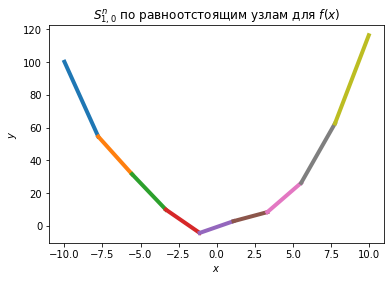

In [36]:
plt.figure()
for k in range(n):
    xspline = np.linspace(x[k], x[k+1])
    yspline = ai[k]*xspline + bi[k]
    plt.plot(xspline, yspline, '-', linewidth=4)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$S_{1,0}^n$ по равноотстоящим узлам для $f(x)$')
plt.show()

## Функция для вычисления значений с помощью $S_{1,0}^n$

In [38]:
def linear_spline(arg):
    flag = 0
    res = 0
    # Нахождение нужного участка интервала с помощью цикла
    for i in range(n):
        if (arg >= x[i]) and (arg <= x[i+1]):
            flag = i
            res = ai[flag]*arg + bi[flag]
    return res

## Оптимальные узлы Чебышева $$x_i = 0.5 \left((b-a)\cos\dfrac{(2i+1)\pi}{2(n+1)} + (b+a)\right),\; i\in \overline{0,n}$$

In [39]:
# оптимальные узлы Чебышева
chebish = []
for i in range(0, m):
    chebish.append(0.5 * ((b-a)*np.cos(((2*i+1)*np.pi)/(2*(m+1))) + (b+a)))

In [40]:
# n - число линейных сплайнов
n = m - 1

# AB = C
A = np.zeros((2*n, 2*n))
C = np.zeros(2*n)

for i in range(n):
    A[i, i] = chebish[i]
    A[i, n+i] = 1
    
    # Строки [n, 2n-1]
    A[n+i, i] = chebish[i+1]
    A[n+i, n+i] = 1

    C[i] = fn(chebish[i])
    C[n+i] = fn(chebish[i+1])

# В последней строке задаем a_1 = 1    
A[2*n-1, 0] = 1

# Решаем относительно b
B = np.linalg.solve(A,C)
ai = B[:n]
bi = B[n:2*n]

## Отрисуем линейный сплайн по $m$ узлам Чебышева

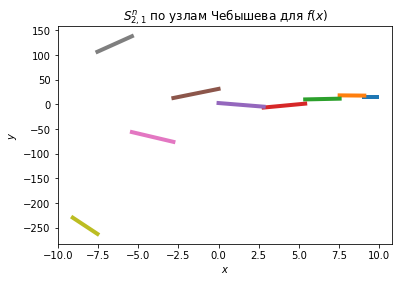

In [41]:
plt.figure()

for k in range(n):
    xspline_opt = np.linspace(chebish[k], chebish[k+1])
    yspline_opt = ai_opt[k]*xspline_opt + bi_opt[k]
    plt.plot(xspline_opt, yspline_opt, '-', linewidth=4)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$S_{2,1}^n$ по узлам Чебышева для $f(x)$')
plt.show()